# 데이터, 라이브러리 불러오기


In [ ]:
# 기본적인 라이브러리
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/블랙보드.xlsx")

Mounted at /content/drive


# 대학/대학원생 구분

In [ ]:
df=data.copy()

In [ ]:
df.loc[df['학년']=='1학년','학년구분']='학부생'
df.loc[df['학년']=='2학년','학년구분']='학부생'
df.loc[df['학년']=='3학년','학년구분']='학부생'
df.loc[df['학년']=='4학년','학년구분']='학부생'
df.loc[df['학년']=='석사과정','학년구분']='대학원생'
df.loc[df['학년']=='박사과정','학년구분']='대학원생'
df.loc[df['학년']=='석박사통합과정','학년구분']='대학원생'

In [ ]:
df1=df[df['학년구분']=='학부생']

In [ ]:
df2=df[df['학년구분']=='대학원생']

# 현황분석

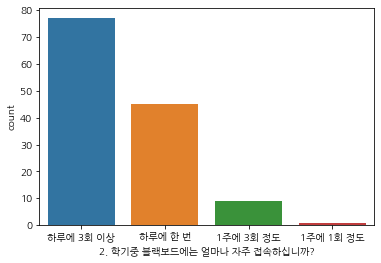

In [ ]:
sns.countplot(x='2. 학기중 블랙보드에는 얼마나 자주 접속하십니까?',data=df1)

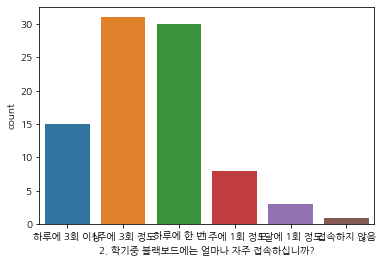

In [ ]:
sns.countplot(x='2. 학기중 블랙보드에는 얼마나 자주 접속하십니까?',data=df2)

In [ ]:
from dataprep.eda import *
import pandas as pd
plot(df, "학년구분","2. 학기중 블랙보드에는 얼마나 자주 접속하십니까?") #학부생의 경우 블랙보드 접속 횟수 더 많음

In [ ]:
plot(df, "학년구분","3. 학기중 블랙보드를 가장 많이 활용한 시간대는 언제입니까?") #학부생 오후 시간대 살짝 더 높음

**2. 학기중 블랙보드에는 얼마나 자주 접속하십니까?** -> 학부생 대부분 하루에 한 번은 접속/대학원생은 하루에 한 번 이상 접속이 약 50%정도

**3. 학기중 블랙보드를 가장 많이 활용한 시간대는 언제입니까?** -> 학부생은 오후1(12~15)의 비율이 가장 높고, 대학원생은 저녁, 오후2가 많음 / 오후와 저녁으로 구분하면 차이 많지는 않은 듯
5. 어떤 브라우저를 사용하여 블랙보드를 주로 접속하십니까? -> 둘다 거의 대부분 크롬
**10. 블랙보드 내에서 가장 선호하는 온라인수업(비대면) 운영 방식은 무엇입니까?** -> 학부생은 줌, 녹화영상, 콜라보 순서(비율은 큰 차이가 나진 않음), 대학원생은 55% 줌, 30% 녹화영상
11. 귀하가 생각하는 가장 효과적인 블랙보드 내 학습활동은 무엇입니까? -> 둘다 영상출석콘텐츠 외 자료제공, 과제
18. 블랙보드 내에서 가장 선호하는 소통 방식을 선택하여 주십시오. ->과제퀴즈 피드백

**15. 블랙보드 영상 출석콘텐츠 수업 방식의 한계는 무엇이라고 생각하십니까?(복수응답 가능)** -> 대학원생은 학부생에 비해 상호작용 불가로 인한 질의응답 어려움과 없음, 학부생은 대학원생에 비해 출석 반영 오류에 대한 응답 비율이 약간씩 더 높음
17. 실시간 화상강의(Zoom, Collaborate)를 활용한 온라인수업의 한계는 무엇이라고 생각하십니까? (복수응답 가능)->접속 오류로 인한 끊김이 둘다 높음
21. 블랙보드 이용 시 오류를 겪었다면, 어떤 유형의 오류였는지 표기해주십시오. (복수응답 가능)->학부생은 실시간 화상강의 참여, 코스 화면 접속에 대한 응답이 약간 높고, 대학원생은 없음, 코스 화면 접속에 대한 응답 높음

# 전반적

In [ ]:
from scipy.stats import levene, ttest_ind

In [ ]:
# 대학생
df1['14. 블랙보드 영상 출석콘텐츠 수업 방식에 대해 전반적으로 만족합니까?'].mean()

3.604651162790698

In [ ]:
# 대학원생
df2['14. 블랙보드 영상 출석콘텐츠 수업 방식에 대해 전반적으로 만족합니까?'].mean()

3.8684210526315788

In [ ]:
dff=df.dropna(subset=['14. 블랙보드 영상 출석콘텐츠 수업 방식에 대해 전반적으로 만족합니까?'])

In [ ]:
# 등분산 검정
print(levene((dff[dff['학년구분'] == '학부생']['14. 블랙보드 영상 출석콘텐츠 수업 방식에 대해 전반적으로 만족합니까?']),
             (dff[dff['학년구분'] == '대학원생']['14. 블랙보드 영상 출석콘텐츠 수업 방식에 대해 전반적으로 만족합니까?'])))

LeveneResult(statistic=2.1359115576267396, pvalue=0.1454311048681678)


In [ ]:
# 독립표본 t-검정
ttest_ind((dff[dff['학년구분'] == '학부생']['14. 블랙보드 영상 출석콘텐츠 수업 방식에 대해 전반적으로 만족합니까?']),
          (dff[dff['학년구분'] == '대학원생']['14. 블랙보드 영상 출석콘텐츠 수업 방식에 대해 전반적으로 만족합니까?']), equal_var = True)

Ttest_indResult(statistic=-1.8492296931813559, pvalue=0.06587859681213881)

In [ ]:
plot(df,'학년구분','16. 실시간 화상강의(Zoom, Collaborate) 수업 방식에 대해 전반적으로 만족합니까?')

In [ ]:
# 대학생
df1['16. 실시간 화상강의(Zoom, Collaborate) 수업 방식에 대해 전반적으로 만족합니까?'].mean()

3.7786259541984735

In [ ]:
# 대학원생
df2['16. 실시간 화상강의(Zoom, Collaborate) 수업 방식에 대해 전반적으로 만족합니까?'].mean()

4.0

In [ ]:
dff2=df.dropna(subset=['16. 실시간 화상강의(Zoom, Collaborate) 수업 방식에 대해 전반적으로 만족합니까?'])

In [ ]:
# 등분산 검정
print(levene((dff2[dff2['학년구분'] == '학부생']['16. 실시간 화상강의(Zoom, Collaborate) 수업 방식에 대해 전반적으로 만족합니까?']),
             (dff2[dff2['학년구분'] == '대학원생']['16. 실시간 화상강의(Zoom, Collaborate) 수업 방식에 대해 전반적으로 만족합니까?'])))

LeveneResult(statistic=1.9327931219554628, pvalue=0.16589073285392117)


In [ ]:
# 독립표본 t-검정
ttest_ind((dff2[dff2['학년구분'] == '학부생']['16. 실시간 화상강의(Zoom, Collaborate) 수업 방식에 대해 전반적으로 만족합니까?']),
          (dff2[dff2['학년구분'] == '대학원생']['16. 실시간 화상강의(Zoom, Collaborate) 수업 방식에 대해 전반적으로 만족합니까?']), equal_var = True)

Ttest_indResult(statistic=-2.031242062970836, pvalue=0.04346109917560715)

전반적인 만족도는 학부생/대학원생 큰 차이 없음, 항목(1,2,3,4,5)별 분포도 비슷하고 대부분 3.7~4 사이

**1. 블랙보드 시스템에 전반적으로 만족하십니까?** pvalue=0.0036

**16. 실시간 화상강의(Zoom, Collaborate) 수업 방식에 대해 전반적으로 만족합니까?** pvalue=0.048

In [ ]:
df1.mean().sort_values()

<ipython-input-139-f657a048b4bf>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df1.mean().sort_values()


23. 모바일 APP Blackboard는 웹에서 이용하는 주요 기능을 모바일 기기에서 이용 가능하도록 구성되었습니다. 모바일 APP 이용에 얼마나 만족하십니까?    2.659091
35. 그룹활동(토론, 블로그, 저널) 기능에 만족하십니까?                                                             3.446970
14. 블랙보드 영상 출석콘텐츠 수업 방식에 대해 전반적으로 만족합니까?                                                      3.604651
25. 코스 화면에서는 과거 코스, 현재 수강 중인 코스 목록을 손쉽게 파악할 수 있도록 구성되어 있습니다. 코스 화면 구성에 만족하십니까?                3.651515
31. 영상 출결 콘텐츠(커먼즈, 유튜브, 구글 드라이브) 기능에 만족하십니까?                                                  3.727273
1. 블랙보드 시스템에 전반적으로 만족하십니까?                                                                    3.734848
39. 시험/락다운브라우저 기능에 만족하십니까?                                                                    3.742424
19. 블랙보드 기능에 전반적으로 만족하십니까?                                                                    3.757576
22. 블랙보드 홈페이지는 LMS를 사용하는데 필요한 정보를 손쉽게 찾고 관련 안내를 신속하게 전달할 수 있도록 구성되었습니다. 이 구성에 만족하십니까?         3.765152
16. 실시간 화상강의(Zoom, Collaborate) 수업 방식에 대해 전반적으로 만족합니까?                   

In [ ]:
df2.mean().sort_values()

<ipython-input-140-39a862ea5fb4>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df2.mean().sort_values()


23. 모바일 APP Blackboard는 웹에서 이용하는 주요 기능을 모바일 기기에서 이용 가능하도록 구성되었습니다. 모바일 APP 이용에 얼마나 만족하십니까?    3.420455
22. 블랙보드 홈페이지는 LMS를 사용하는데 필요한 정보를 손쉽게 찾고 관련 안내를 신속하게 전달할 수 있도록 구성되었습니다. 이 구성에 만족하십니까?         3.579545
35. 그룹활동(토론, 블로그, 저널) 기능에 만족하십니까?                                                             3.579545
7. 블랙보드 강의실 내 메뉴는 직관적이라고 생각하십니까?                                                              3.636364
27. 코스 홈 접속 후 좌측에 나타나는 코스 메뉴 구성에 만족하십니까?                                                      3.772727
6. 블랙보드 메인 화면의 구성 및 디자인에 만족하십니까?                                                              3.784091
31. 영상 출결 콘텐츠(커먼즈, 유튜브, 구글 드라이브) 기능에 만족하십니까?                                                  3.829545
39. 시험/락다운브라우저 기능에 만족하십니까?                                                                    3.840909
8. 블랙보드에서 제공되는 정보들은 잘 분류되어 있습니까?                                                              3.852273
25. 코스 화면에서는 과거 코스, 현재 수강 중인 코스 목록을 손쉽게 파악할 수 있도록 구성되어 있습니다. 코스 화면 구성에 만족

# 워드클라우드

## 24. 모바일 APP 이용 시 개선되었으면 하는 점을 자유롭게 작성하여 주십시오.

In [ ]:
!pip install konlpy

In [ ]:
!pip install wordcloud

In [ ]:
from konlpy.tag import Okt
from wordcloud import WordCloud
from PIL import Image

In [ ]:
df1_1=df1['24. 모바일 APP 이용 시 개선되었으면 하는 점을 자유롭게 작성하여 주십시오.']
df2_1=df2['24. 모바일 APP 이용 시 개선되었으면 하는 점을 자유롭게 작성하여 주십시오.']

In [ ]:
df1_1.dropna(inplace=True)
df2_1.dropna(inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


In [ ]:
df1_1.head()

1                 코스 화면이 안 들어가짐 UI도 별로임
3                               알림기능 선택
7            앱에 접속할 때마다 로그인 해야 하는 게 귀찮다
11                               알림 활성화
17    ui가 블랙보드 웹페이지와 비슷하게 만들어졌으면 좋겠습니다.
Name: 24. 모바일 APP 이용 시 개선되었으면 하는 점을 자유롭게 작성하여 주십시오., dtype: object

In [ ]:
df2_1.head()

0     전반적인 모든 것(사실 모바일 사용을 권장하지 않고 있지 않습니까 ??! ㅎㅎ)
12                                    수정 기능 사용의 한계
13                                  앱을 이용해본 적이 없다.
15                          강의파일 다운로드가 가능하도록 기능 추가
20                                      직관적인 인터페이스
Name: 24. 모바일 APP 이용 시 개선되었으면 하는 점을 자유롭게 작성하여 주십시오., dtype: object

In [ ]:
df1_1.to_csv('df1_1.txt',index=False,sep='\t')
df2_1.to_csv('df2_1.txt',index=False,sep='\t')

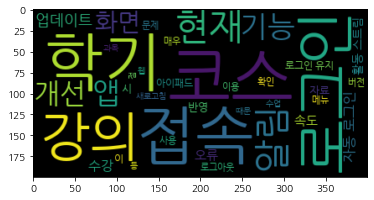

In [ ]:
#학부생
file=open('df1_1.txt','r',encoding='utf-8')
reply_text=file.readlines()
file.close()
del reply_text[0]
ok_twitter=Okt()
font = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
text=''
for sentences in reply_text:
  for noun in ok_twitter.nouns(sentences):
    if noun in ['때','경우','더','것','수','모바일']:
      pass
    else:
      text+=noun+' '

wc=WordCloud(font_path=font,
             max_words=200,
             min_font_size=10).generate(text)
plt.imshow(wc, interpolation='bilinear')

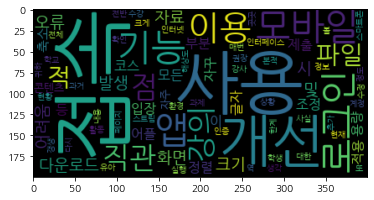

In [ ]:
#대학원생
file=open('df2_1.txt','r',encoding='utf-8')
reply_text=file.readlines()
file.close()
del reply_text[0]
ok_twitter=Okt()
font = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
text=''
for sentences in reply_text:
  for noun in ok_twitter.nouns(sentences):
    if noun in ['때','경우','더','것','수']:
      pass
    else:
      text+=noun+' '

wc=WordCloud(font_path=font,
             max_words=200,
             min_font_size=10).generate(text)
plt.imshow(wc, interpolation='bilinear')

## 26. 코스 화면에서 개선되었으면 하는 점을 자유롭게 작성하여 주십시오.

In [ ]:
df1_2=df1['26. 코스 화면에서 개선되었으면 하는 점을 자유롭게 작성하여 주십시오.']
df2_2=df2['26. 코스 화면에서 개선되었으면 하는 점을 자유롭게 작성하여 주십시오.']
df1_2.dropna(inplace=True)
df2_2.dropna(inplace=True)
df1_2.to_csv('df1_2.txt',index=False,sep='\t')
df2_2.to_csv('df2_2.txt',index=False,sep='\t')

/usr/local/lib/python3.8/dist-packages/pandas/core/series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


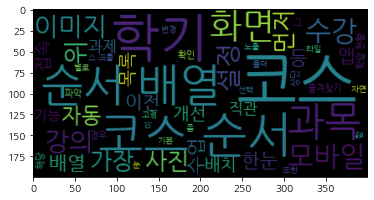

In [ ]:
#학부생
file=open('df1_2.txt','r',encoding='utf-8')
reply_text=file.readlines()
file.close()
del reply_text[0]
ok_twitter=Okt()
font = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
text=''
for sentences in reply_text:
  for noun in ok_twitter.nouns(sentences):
    if noun in ['이번','수','현재','별','더','것']:
      pass
    else:
      text+=noun+' '

wc=WordCloud(font_path=font,
             max_words=200,
             min_font_size=10).generate(text)
plt.imshow(wc, interpolation='bilinear')

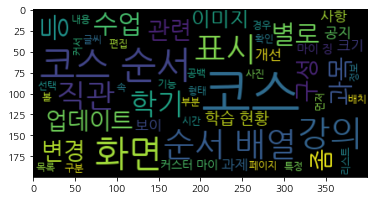

In [ ]:
#학부생
file=open('df2_2.txt','r',encoding='utf-8')
reply_text=file.readlines()
file.close()
del reply_text[0]
ok_twitter=Okt()
font = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
text=''
for sentences in reply_text:
  for noun in ok_twitter.nouns(sentences):
    if noun in ['이번','수','현재','별','더','것']:
      pass
    else:
      text+=noun+' '

wc=WordCloud(font_path=font,
             max_words=200,
             min_font_size=10).generate(text)
plt.imshow(wc, interpolation='bilinear')